PATH

Importation des packages nécessaires et du jeu de données

A. Evaluation sur les tweets sans traitement

B. Evaluation sur les tweets traités: "Corpus"

C. Evaluation sur les tweets traités avec POS tagging: "Corpus"+"POS tagging"

Résultats


## PATH

In [74]:
file_path_data = 'data/data_clean/'
file_path_models = 'models_training/'

# Importation des packages nécessaires et du jeu de données

In [75]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re 
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report
import pickle

In [76]:
df = pd.read_csv(file_path_data+'data_clean.csv', index_col = 0)

# A. Evaluation sur  les tweets sans traitement

## I. Données et modèles entraînés

In [77]:
# Path des modèles entrainés
trained_model_path = file_path_models+'Best_models_A/'

In [78]:
# Données
X = df['text']
y = df.target

In [79]:
# Séparation des données
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state = 0)

In [80]:
X_test

index
10675               can't figure out how to load a picture 
27440     In bed. Still got cracking headache. 3 weeks now 
169327    just back from the city and I am now the proud...
180780    I need to set up tea making facilities in my car 
120093    #ASOT400 Buenos Aires @Argentina, under A stat...
                                ...                        
49428     Stuffed now  just had a pint and steak in the ...
90616     @thomshouse quite sure it wasn't &quot;hacked&...
48264     Is mooooving to the iiiisland! but can't find ...
174711                      @bogarantyu no, he's recovered 
170286    YOU didn't expect this from me on a Saturday m...
Name: text, Length: 39989, dtype: object

## II. Evaluation des modèles

In [81]:
# Créer un dictionnaire qui contient les prédictions
prediction_A = dict()

## 1. Avec CountVectorizer:

In [82]:
# Vectorizer les données
vectorizer = pickle.load(open(trained_model_path+'vectorizer.sav', 'rb'))
X_test = vectorizer.transform(X_test)
X_train = vectorizer.transform(X_train)

In [83]:
models_name = ['Logistic', 'Naif bayésien BernoulliNB', 'Naif bayésien MultinomialNB', 'Decision Tree',
              'Random Forest']
trained_models = ['logreg','ber','nb','dc','rf']

In [84]:
# models_name = ['KNeighbors', 'XGBoost', 'GradientBoosting', 'AdaBoost']#, 'MLP']
# trained_models = ['knn','xgb','gradbt','ac']#, 'mlp']

In [85]:
def test(models_name, trained_models, X_test, y_test, s = 'tweets'):
    prediction = dict()
    for i in range(len(models_name)):
        model = pickle.load(open(trained_model_path+trained_models[i]+'.sav', 'rb'))     
        prediction[models_name[i] + '_' + s ] = model.predict(X_test) #save the prediction to dictionary
        print("\n"+"="*40+models_name[i]+"="*40+"\n")
        print("Evaluation détaillée de la Classification par " + models_name[i] +":\n \n", classification_report(y_test,prediction[models_name[i] + '_' + s]))
        confusion_matrix = pd.crosstab(y_test, prediction[models_name[i] + '_' + s], rownames=['Classe réelle'],colnames=['Classe prédite'])
        print("La matrice de confusion pour la Classification par " + models_name[i] +" :\n \n" ,confusion_matrix)
        accuracy = model.score(X_test, y_test)
        print("Le score pour la Classification par " + models_name[i] + ": ",accuracy)
    return prediction

In [86]:
prediction_A.update(test(models_name, trained_models, X_test, y_test, s = 'vec'))


========================================Logistic========================================

Evaluation détaillée de la Classification par Logistic:
 
              precision    recall  f1-score   support

          0       0.80      0.78      0.79     19887
          4       0.78      0.81      0.80     20102

avg / total       0.79      0.79      0.79     39989

La matrice de confusion pour la Classification par Logistic :
 
 Classe prédite      0      4
Classe réelle               
0               15428   4459
4                3892  16210
Le score pour la Classification par Logistic:  0.7911675710820476

========================================Naif bayésien BernoulliNB========================================

Evaluation détaillée de la Classification par Naif bayésien BernoulliNB:
 
              precision    recall  f1-score   support

          0       0.76      0.81      0.78     19887
          4       0.80      0.74      0.77     20102

avg / total       0.78      0.78      0.78 

**Commentaire:** _La grille de recherche nous a permis de retrouver les paramètres optimaux du modèle de régression logistique qui sont: {'C': 0.1, 'penalty': 'l2'}._

**Commentaire:** _La grille de recherche nous a permis de retrouver les paramètres optimaux du modèle knn qui sont: {'metric': 'minkowski', 'n_neighbors': 13, 'weights': 'distance'}._

**Commentaire:** _Le modèle de régression logistique fournit des résultats très satisfaisants._

**Commentaire:** _Les résultats obtenus avec le modèle naif bayésien BernoulliNB sont également satisfaisants. Le score, la précision et le recall obtenus sont corrects._

**Commentaire:** _Les résultats obtenus avec le modèle naif bayésien MultinomialNB sont quasi similaires à ceux du BernoulliNB._

**Commentaire:** _Le modèle knn forunit des résultats assez moyens._

**Commentaire:** _Les résultats obtenus avec le modèle arbre de décision sont proches de ceux du knn._

**Commentaire:** _Les résultats obtenus avec le modèle de forêt aléatoire sont satisfaisants._

**Commentaire:** _Les résultats obtenus avec les modèles de boosting sont satisfaisants._

# 2. Avec une TF-IDF

## 2.1.MLP

In [97]:
X_train_mlp,X_test_mlp,y_train_mlp,y_test_mlp = train_test_split(df.text,df.target,test_size=0.2,random_state = 0)
tvec_mlp = pickle.load(open(trained_model_path+'tvec_mlp.sav', 'rb'))
X_test_mlp = tvec_mlp.transform(X_test_mlp)

In [88]:
mlp = pickle.load(open(trained_model_path+'mlp_tfid.sav', 'rb'))

In [89]:
prediction_A['MLP'] = mlp.predict(X_test_mlp)

In [90]:
print("Evaluation détaillée de la Classification par régression logistique :\n \n" ,classification_report(y_test_mlp,prediction_A['MLP']))
confusion_matrix = pd.crosstab(y_test_mlp, prediction_A['MLP'], rownames=['Classe réelle'],colnames=['Classe prédite'])
print("La matrice de confusion pour la Classification par régression logistique :\n \n" ,confusion_matrix)
accuracy = mlp.score(X_test_mlp, y_test_mlp)
print("Le score pour la Classification par régression logistique :",accuracy)

Evaluation détaillée de la Classification par régression logistique :
 
              precision    recall  f1-score   support

          0       0.90      0.95      0.93     19887
          4       0.95      0.89      0.92     20102

avg / total       0.92      0.92      0.92     39989

La matrice de confusion pour la Classification par régression logistique :
 
 Classe prédite      0      4
Classe réelle               
0               18953    934
4                2134  17968
Le score pour la Classification par régression logistique : 0.9232789016979669


## 2.2 Logistique régression

In [101]:
X_train_tf,X_test_tf,y_train_tf,y_test_tf = train_test_split(df.text,df.target,test_size=0.2,random_state = 0)
tvec = pickle.load(open(trained_model_path+'tvec.sav', 'rb'))
X_test_tf = tvec.transform(X_test_tf)

In [102]:
logreg_tfid = pickle.load(open(trained_model_path+'logreg_tfid.sav', 'rb'))
prediction_A['Logistic_tfid'] = logreg_tfid.predict(X_test_tf)

In [103]:
print("Evaluation détaillée de la Classification par régression logistique :\n \n" ,classification_report(y_test_tf,prediction_A['Logistic_tfid']))
confusion_matrix = pd.crosstab(y_test_tf, prediction_A['Logistic_tfid'], rownames=['Classe réelle'],colnames=['Classe prédite'])
print("La matrice de confusion pour la Classification par régression logistique :\n \n" ,confusion_matrix)
accuracy = logreg_tfid.score(X_test_tf, y_test_tf)
print("Le score pour la Classification par régression logistique :",accuracy)

Evaluation détaillée de la Classification par régression logistique :
 
              precision    recall  f1-score   support

          0       0.78      0.77      0.78     19887
          4       0.78      0.78      0.78     20102

avg / total       0.78      0.78      0.78     39989

La matrice de confusion pour la Classification par régression logistique :
 
 Classe prédite      0      4
Classe réelle               
0               15360   4527
4                4350  15752
Le score pour la Classification par régression logistique : 0.7780139538373052


**Commentaire:** _La méthode TF-IDF appliquée au modèle de régression logistique fournit des résultats assez satisfaisants mais légèrement inférieurs à ceux avec le CountVectorizer._

## III. Comparaison des modèles

In [93]:
prediction_A

{'Decision Tree_vec': array([0, 0, 0, ..., 0, 0, 4]),
 'Logistic_tfid': array([0, 0, 4, ..., 0, 0, 4]),
 'Logistic_vec': array([0, 0, 4, ..., 0, 0, 4]),
 'MLP': array([0, 0, 4, ..., 0, 0, 4]),
 'Naif bayésien BernoulliNB_vec': array([0, 0, 4, ..., 0, 0, 4]),
 'Naif bayésien MultinomialNB_vec': array([0, 0, 4, ..., 0, 0, 4]),
 'Random Forest_vec': array([0, 0, 4, ..., 0, 0, 0])}

### 1. Matrices de confusion

In [94]:
classes= (0,4)
def plot_confusion_matrix(cm, cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    plt.tight_layout()
    plt.ylabel('Vrais labels')
    plt.xlabel('Labels prédits')

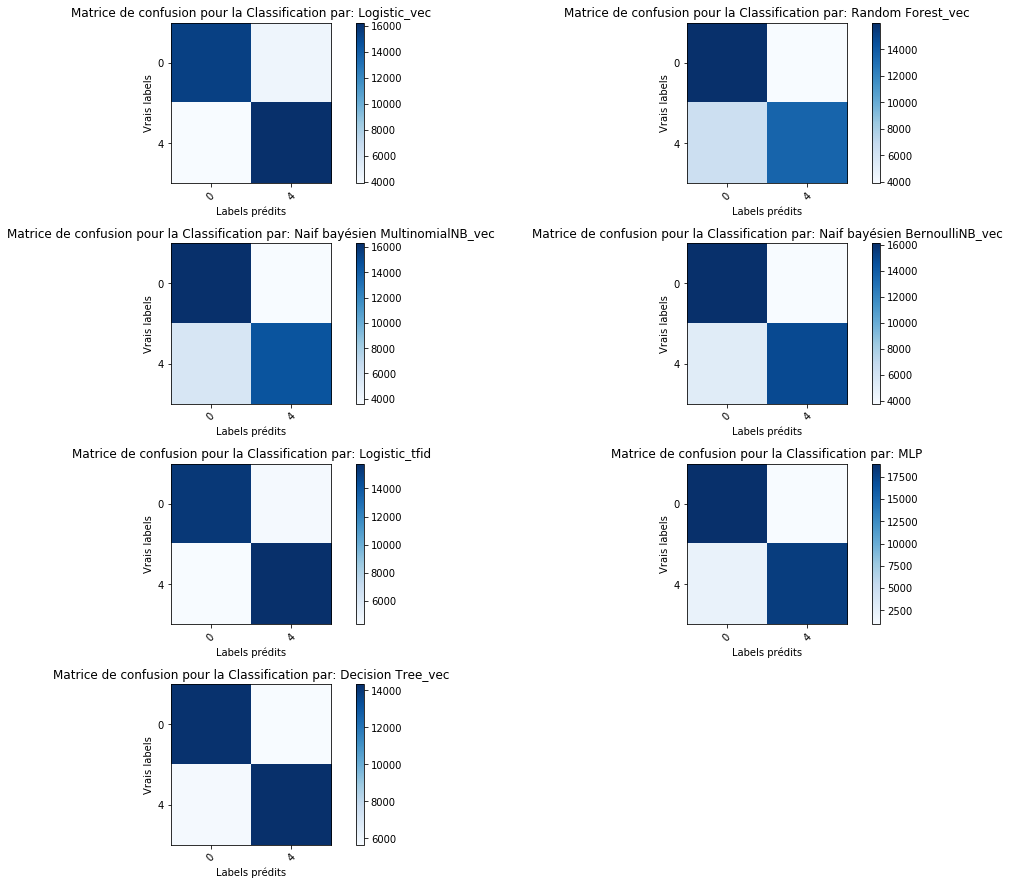

In [95]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(15,15))
i=0
for model, predicted in prediction_A.items():
    i=i+1
    plt.subplot(5,2,i)
    plt.title('Matrice de confusion pour la Classification par: %s'% model)
    cm_model = confusion_matrix(y_test, predicted)
    plot_confusion_matrix(cm_model)

**Commentaire:** _Les matrices de confusion colorées reflètent bien les résulats des différents modèles avec une intensité de couleur plus prononcée sur la diagonale pour les méthodes de régression logistique et l'arbre de décision ._

### 2. Courbes de ROC

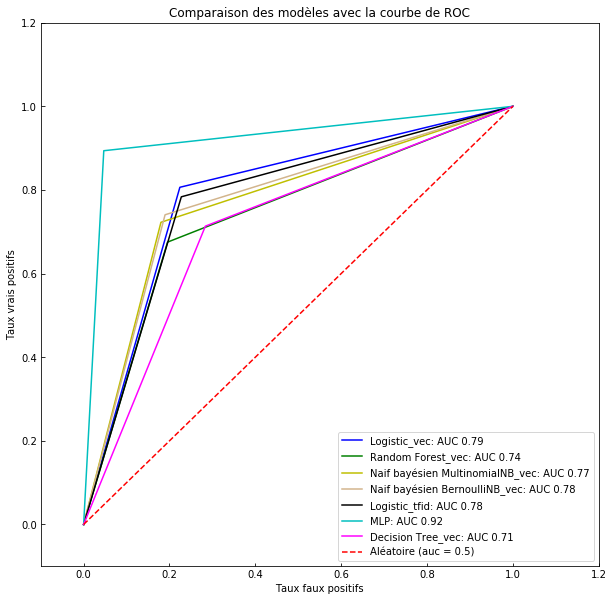

In [96]:
from sklearn.metrics import roc_curve,auc
cmp = 0
colors = ['b', 'g', 'y', 'tan', 'k','c','fuchsia','grey','orange','purple','pink']

plt.figure(figsize=(10,10))
for model, predicted in prediction_A.items():
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, predicted,pos_label=4)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    plt.plot(false_positive_rate, true_positive_rate, colors[cmp], label='%s: AUC %0.2f'% (model,roc_auc))
    cmp += 1
plt.title('Comparaison des modèles avec la courbe de ROC')
plt.plot([0, 1], [0, 1], color='r',linestyle='--',label='Aléatoire (auc = 0.5)')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('Taux vrais positifs')
plt.xlabel('Taux faux positifs')
plt.legend(loc='best')
plt.tick_params(direction='in')
plt.show()

**Commentaire:** _Ce graphique présente toutes les courbes de ROC des différents modèles. Il confirme les résultats antérieurs avec des modèles bien plus performants que d'autres et notamment: la régression logistique, le naif bayésien et le random forest._  

## Scalability

In [98]:
file_path_data_scalability = 'data_scalability/movie_reviews/'

In [99]:
mov = pd.read_csv(file_path_data_scalability+'movie_reviews.csv')
mov.rename(columns={"Sentiment": "target", "SentimentText": "text"}, inplace=True)
mov['target'] = mov['target'].replace([1],[4])
X_mov = mov['text']
y_mov = mov.target
X_mov = tvec_mlp.transform(X_mov)

In [100]:
mlp.score(X_mov,y_mov)

0.65784

# B. Evaluation sur les tweets  traités: "Corpus"


## I. Données et modèles entraînés

In [9]:
# Path des modèles entrainés
trained_model_path = file_path_models+'Best_models_B/'

In [10]:
# Données
X = df['clean_text']
y = df.target

In [11]:
# Séparation des données
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state = 0)

In [12]:
# Vectorizer les données
vectorizer = pickle.load(open(trained_model_path+'vectorizer.sav', 'rb'))
X_test = vectorizer.transform(X_test)

In [10]:
# Créer un dictionnaire qui contient les prédictions
prediction_B = dict()

## II. Evaluation des modèles

### 1. Régression logistique 

**Commentaire:** _La grille de recherche nous a permis de retrouver les paramètres optimaux du modèle de régression logistique qui sont: {'C': 0.1, 'penalty': 'l2'}._

In [11]:
logreg = pickle.load(open(trained_model_path+'logreg.sav', 'rb'))
prediction_B['Logistic'] = logreg.predict(X_test)

In [16]:
np.size(np.abs(logreg.coef_))

127360

In [17]:
X_test.shape

(39989, 127360)

In [15]:
print("Evaluation détaillée de la Classification par régression logistique :\n \n" ,classification_report(y_test,prediction_B['Logistic']))
confusion_matrix = pd.crosstab(y_test, prediction_B['Logistic'], rownames=['Classe réelle'],colnames=['Classe prédite'])
print("La matrice de confusion pour la Classification par régression logistique :\n \n" ,confusion_matrix)
accuracy = logreg.score(X_test, y_test)
print("Le score pour la Classification par régression logistique :",accuracy)

Evaluation détaillée de la Classification par régression logistique :
 
               precision    recall  f1-score   support

           0       0.78      0.74      0.76     19887
           4       0.75      0.79      0.77     20102

    accuracy                           0.77     39989
   macro avg       0.77      0.77      0.77     39989
weighted avg       0.77      0.77      0.77     39989

La matrice de confusion pour la Classification par régression logistique :
 
 Classe prédite      0      4
Classe réelle               
0               14669   5218
4                4146  15956
Le score pour la Classification par régression logistique : 0.7658356047913176


**Commentaire:** _Le modèle de régression logistique fournit des résultats très satisfaisants._

#### Avec une TF-IDF

In [16]:
X_train_tf,X_test_tf,y_train_tf,y_test_tf = train_test_split(df.text,df.target,test_size=0.2,random_state = 0)
tvec = tvec = pickle.load(open(trained_model_path+'tvec.sav', 'rb'))
X_test_tvec = tvec.transform(X_test_tf)

In [17]:
logreg_tfid = pickle.load(open(trained_model_path+'logreg_tfid.sav', 'rb'))
prediction_B['Logistic_tfid'] = logreg_tfid.predict(X_test_tvec)

In [18]:
print("Evaluation détaillée de la Classification par régression logistique :\n \n" ,classification_report(y_test_tf,prediction_B['Logistic_tfid']))
confusion_matrix = pd.crosstab(y_test_tf, prediction_B['Logistic_tfid'], rownames=['Classe réelle'],colnames=['Classe prédite'])
print("La matrice de confusion pour la Classification par régression logistique :\n \n" ,confusion_matrix)
accuracy = logreg_tfid.score(X_test_tvec, y_test_tf)
print("Le score pour la Classification par régression logistique :",accuracy)

Evaluation détaillée de la Classification par régression logistique :
 
               precision    recall  f1-score   support

           0       0.78      0.55      0.65     19887
           4       0.66      0.85      0.74     20102

    accuracy                           0.70     39989
   macro avg       0.72      0.70      0.69     39989
weighted avg       0.72      0.70      0.69     39989

La matrice de confusion pour la Classification par régression logistique :
 
 Classe prédite      0      4
Classe réelle               
0               10925   8962
4                3012  17090
Le score pour la Classification par régression logistique : 0.700567656105429


**Commentaire:** _La méthode TF-IDF appliquée au modèle de régression logistique fournit des résultats assez satisfaisants mais légèrement inférieurs à ceux avec le CountVectorizer._

### 2. Naif bayésien BernoulliNB

In [19]:
ber = pickle.load(open(trained_model_path+'ber.sav', 'rb'))
prediction_B['Bernoulli'] = ber.predict(X_test)

In [20]:
print("Evaluation détaillée de la Classification par le modèle naif bayésien BernoulliNB :\n \n" ,classification_report(y_test,prediction_B['Bernoulli']))
confusion_matrix = pd.crosstab(y_test, prediction_B['Bernoulli'], rownames=['Classe réelle'],colnames=['Classe prédite'])
print("La matrice de confusion pour la Classification par le modèle naif bayésien BernoulliNB :\n \n" ,confusion_matrix)
accuracy = ber.score(X_test, y_test)
print("Le score pour la Classification par le modèle naif bayésien BernoulliNB :",accuracy)

Evaluation détaillée de la Classification par le modèle naif bayésien BernoulliNB :
 
               precision    recall  f1-score   support

           0       0.74      0.79      0.77     19887
           4       0.78      0.73      0.75     20102

    accuracy                           0.76     39989
   macro avg       0.76      0.76      0.76     39989
weighted avg       0.76      0.76      0.76     39989

La matrice de confusion pour la Classification par le modèle naif bayésien BernoulliNB :
 
 Classe prédite      0      4
Classe réelle               
0               15685   4202
4                5373  14729
Le score pour la Classification par le modèle naif bayésien BernoulliNB : 0.760559153767286


**Commentaire:** _Les résultats obtenus avec le modèle naif bayésien BernoulliNB sont également satisfaisants. Le score, la précision et le recall obtenus sont corrects._

###  3. Naif bayésien MultinomialNB


In [21]:
nb = pickle.load(open(trained_model_path+'nb.sav', 'rb'))
prediction_B['Multinomial'] = nb.predict(X_test)

In [22]:
print("Evaluation détaillée de la Classification par naif bayésien MultinomialNB :\n \n" , classification_report(y_test,prediction_B['Multinomial']))
confusion_matrix = pd.crosstab(y_test, prediction_B['Multinomial'], rownames=['Classe réelle'],colnames=['Classe prédite'])
print("La matrice de confusion pour la Classification par naif bayésien MultinomialNB :\n \n" ,confusion_matrix)
accuracy = nb.score(X_test, y_test)
print("Le score pour la Classification par naif bayésien MultinomialNB :",accuracy)

Evaluation détaillée de la Classification par naif bayésien MultinomialNB :
 
               precision    recall  f1-score   support

           0       0.74      0.79      0.77     19887
           4       0.78      0.73      0.75     20102

    accuracy                           0.76     39989
   macro avg       0.76      0.76      0.76     39989
weighted avg       0.76      0.76      0.76     39989

La matrice de confusion pour la Classification par naif bayésien MultinomialNB :
 
 Classe prédite      0      4
Classe réelle               
0               15780   4107
4                5519  14583
Le score pour la Classification par naif bayésien MultinomialNB : 0.7592838030458376


**Commentaire:** _Les résultats obtenus avec le modèle naif bayésien MultinomialNB sont quasi similaires à ceux du BernoulliNB._

### 4. K plus proches voisins

**Commentaire:** _La grille de recherche nous a permis de retrouver les paramètres optimaux du modèle knn qui sont: {'metric': 'minkowski', 'n_neighbors': 13, 'weights': 'distance'}._

In [23]:
knn = pickle.load(open(trained_model_path+'knn.sav', 'rb'))
prediction_B['KNeighbors']=knn.predict(X_test)

In [24]:
print("Evaluation détaillée de la Classification par KNeighbors :\n \n" , classification_report(y_test,prediction_B['KNeighbors']))
confusion_matrix = pd.crosstab(y_test, prediction_B['KNeighbors'], rownames=['Classe réelle'],colnames=['Classe prédite'])
print("La matrice de confusion pour la Classification par KNeighbors :\n \n" ,confusion_matrix)
accuracy = knn.score(X_test, y_test)
print("Le score pour la Classification par KNeighbors :",accuracy)

Evaluation détaillée de la Classification par KNeighbors :
 
               precision    recall  f1-score   support

           0       0.66      0.72      0.69     19887
           4       0.70      0.63      0.67     20102

    accuracy                           0.68     39989
   macro avg       0.68      0.68      0.68     39989
weighted avg       0.68      0.68      0.68     39989

La matrice de confusion pour la Classification par KNeighbors :
 
 Classe prédite      0      4
Classe réelle               
0               14408   5479
4                7355  12747
Le score pour la Classification par KNeighbors : 0.6790617419790442


**Commentaire:** _Le modèle knn forunit des résultats assez moyens._

### 5. Arbre de décision 

In [25]:
dc = pickle.load(open(trained_model_path+'dc.sav', 'rb'))
prediction_B['Decision Tree'] = dc.predict(X_test)

In [26]:
print("Evaluation détaillée de la Classification par Decision Tree :\n \n" , classification_report(y_test,prediction_B['Decision Tree']))
confusion_matrix = pd.crosstab(y_test, prediction_B['Decision Tree'], rownames=['Classe réelle'],colnames=['Classe prédite'])
print("La matrice de confusion pour la Classification par Decision Tree :\n \n" ,confusion_matrix)
accuracy = dc.score(X_test, y_test)
print("Le score pour la Classification par Decision Tree :",accuracy)

Evaluation détaillée de la Classification par Decision Tree :
 
               precision    recall  f1-score   support

           0       0.68      0.72      0.70     19887
           4       0.71      0.67      0.69     20102

    accuracy                           0.70     39989
   macro avg       0.70      0.70      0.70     39989
weighted avg       0.70      0.70      0.70     39989

La matrice de confusion pour la Classification par Decision Tree :
 
 Classe prédite      0      4
Classe réelle               
0               14349   5538
4                6618  13484
Le score pour la Classification par Decision Tree : 0.6960164045112406


**Commentaire:** _Les résultats obtenus avec le modèle arbre de décision sont proches de ceux du knn._

### 6. Forêt aléatoire


In [27]:
rf = pickle.load(open(trained_model_path+'rf.sav', 'rb'))
prediction_B['RandomForest']=rf.predict(X_test)

In [28]:
print("Evaluation détaillée de la Classification par RandomForest :\n \n" , classification_report(y_test,prediction_B['RandomForest']))
confusion_matrix = pd.crosstab(y_test, prediction_B['RandomForest'], rownames=['Classe réelle'],colnames=['Classe prédite'])
print("La matrice de confusion pour la Classification par RandomForest :\n \n" ,confusion_matrix)
accuracy = rf.score(X_test, y_test)
print("Le score pour la Classification par Random Forest :",accuracy)

Evaluation détaillée de la Classification par RandomForest :
 
               precision    recall  f1-score   support

           0       0.70      0.79      0.74     19887
           4       0.76      0.67      0.71     20102

    accuracy                           0.73     39989
   macro avg       0.73      0.73      0.73     39989
weighted avg       0.73      0.73      0.73     39989

La matrice de confusion pour la Classification par RandomForest :
 
 Classe prédite      0      4
Classe réelle               
0               15684   4203
4                6715  13387
Le score pour la Classification par Random Forest : 0.7269749181024782


**Commentaire:** _Les résultats obtenus avec le modèle de forêt aléatoire sont satisfaisants._

### 7. XGBOOST

In [29]:
xgb = pickle.load(open(trained_model_path+'xgb.sav', 'rb'))
prediction_B['XGBoost'] = xgb.predict(X_test)


In [30]:
print("Evaluation détaillée de la Classification par XGBoost :\n \n" , classification_report(y_test,prediction_B['XGBoost']))
confusion_matrix = pd.crosstab(y_test, prediction_B['XGBoost'], rownames=['Classe réelle'],colnames=['Classe prédite'])
print("La matrice de confusion pour la Classification par XGBoost :\n \n" ,confusion_matrix)
accuracy = xgb.score(X_test, y_test)
print("Le score pour la Classification par XGBoost :",accuracy)

Evaluation détaillée de la Classification par XGBoost :
 
               precision    recall  f1-score   support

           0       0.78      0.52      0.63     19887
           4       0.64      0.85      0.74     20102

    accuracy                           0.69     39989
   macro avg       0.71      0.69      0.68     39989
weighted avg       0.71      0.69      0.68     39989

La matrice de confusion pour la Classification par XGBoost :
 
 Classe prédite      0      4
Classe réelle               
0               10428   9459
4                2919  17183
Le score pour la Classification par XGBoost : 0.6904648778414064


### 8. Gradient Boosting

In [31]:
gradbt = pickle.load(open(trained_model_path+'gradbt.sav', 'rb'))
prediction_B['GradientBoosting']=gradbt.predict(X_test)

In [32]:
print("Evaluation détaillée de la Classification par Gradient Boosting :\n \n" , classification_report(y_test,prediction_B['GradientBoosting']))
confusion_matrix = pd.crosstab(y_test, prediction_B['GradientBoosting'], rownames=['Classe réelle'],colnames=['Classe prédite'])
print("La matrice de confusion pour la Classification par Gradient Boosting :\n \n" ,confusion_matrix)
accuracy = gradbt.score(X_test, y_test)
print("Le score pour la Classification par Gradient Boosting :",accuracy)


Evaluation détaillée de la Classification par Gradient Boosting :
 
               precision    recall  f1-score   support

           0       0.78      0.54      0.64     19887
           4       0.65      0.85      0.74     20102

    accuracy                           0.70     39989
   macro avg       0.72      0.69      0.69     39989
weighted avg       0.72      0.70      0.69     39989

La matrice de confusion pour la Classification par Gradient Boosting :
 
 Classe prédite      0      4
Classe réelle               
0               10703   9184
4                2980  17122
Le score pour la Classification par Gradient Boosting : 0.6958163494961115


## 9. Adaboost


In [33]:
ac = pickle.load(open(trained_model_path+'ac.sav', 'rb'))
prediction_B['AdaBoost']=ac.predict(X_test)

In [34]:
print("Evaluation détaillée de la Classification par AdaBoost :\n \n" , classification_report(y_test,prediction_B['AdaBoost']))
confusion_matrix = pd.crosstab(y_test, prediction_B['AdaBoost'], rownames=['Classe réelle'],colnames=['Classe prédite'])
print("La matrice de confusion pour la Classification par AdaBoost :\n \n" ,confusion_matrix)
accuracy = ac.score(X_test, y_test)
print("Le score pour la Classification par AdaBoost :",accuracy)

Evaluation détaillée de la Classification par AdaBoost :
 
               precision    recall  f1-score   support

           0       0.78      0.64      0.70     19887
           4       0.70      0.82      0.75     20102

    accuracy                           0.73     39989
   macro avg       0.74      0.73      0.73     39989
weighted avg       0.74      0.73      0.73     39989

La matrice de confusion pour la Classification par AdaBoost :
 
 Classe prédite      0      4
Classe réelle               
0               12662   7225
4                3559  16543
Le score pour la Classification par AdaBoost : 0.7303258396058916


**Commentaire:** _Les résultats obtenus avec les modèles de boosting sont satisfaisants._

## III. Comparaison des modèles

In [39]:
prediction_B

{'Logistic': array([4, 0, 4, ..., 0, 4, 4]),
 'Logistic_tfid': array([4, 0, 4, ..., 0, 4, 4]),
 'Bernoulli': array([4, 0, 4, ..., 0, 0, 4]),
 'Multinomial': array([4, 0, 4, ..., 0, 0, 4]),
 'KNeighbors': array([4, 0, 4, ..., 4, 4, 0]),
 'Decision Tree': array([4, 0, 4, ..., 0, 4, 4]),
 'RandomForest': array([4, 0, 0, ..., 4, 4, 4]),
 'XGBoost': array([4, 0, 4, ..., 4, 4, 4]),
 'GradientBoosting': array([4, 0, 4, ..., 4, 4, 4]),
 'AdaBoost': array([4, 0, 4, ..., 0, 4, 4])}

### 1. Matrices de confusion

In [36]:
classes= (0,4)
def plot_confusion_matrix(cm, cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    plt.tight_layout()
    plt.ylabel('Vrais labels')
    plt.xlabel('Labels prédits')

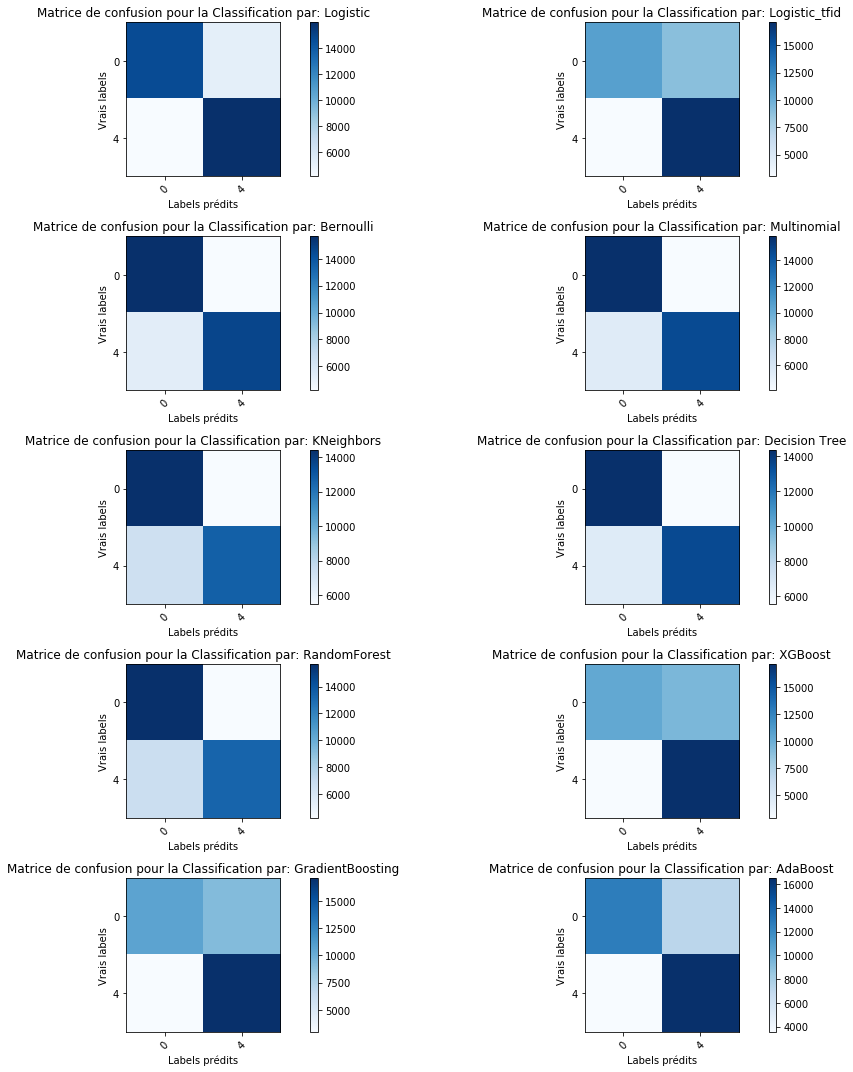

In [37]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(15,15))
i=0
for model, predicted in prediction_B.items():
    i=i+1
    plt.subplot(5,2,i)
    plt.title('Matrice de confusion pour la Classification par: %s'% model)
    cm_model = confusion_matrix(y_test, predicted)
    plot_confusion_matrix(cm_model)

**Commentaire:** _Les matrices de confusion colorées reflètent bien les résulats des différents modèles avec une intensité de couleur plus prononcée sur la diagonale pour les méthodes de random forest et arbre de décision ._

### 2. Courbes de ROC

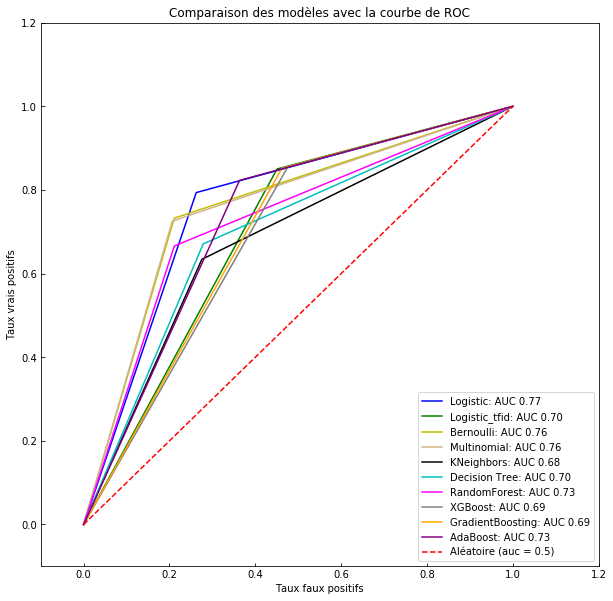

In [41]:
from sklearn.metrics import roc_curve,auc
cmp = 0
colors = ['b', 'g', 'y', 'tan', 'k','c','fuchsia','grey','orange','purple']

plt.figure(figsize=(10,10))
for model, predicted in prediction_B.items():
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, predicted,pos_label=4)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    plt.plot(false_positive_rate, true_positive_rate, colors[cmp], label='%s: AUC %0.2f'% (model,roc_auc))
    cmp += 1
plt.title('Comparaison des modèles avec la courbe de ROC')
plt.plot([0, 1], [0, 1], color='r',linestyle='--',label='Aléatoire (auc = 0.5)')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('Taux vrais positifs')
plt.xlabel('Taux faux positifs')
plt.legend(loc='best')
plt.tick_params(direction='in')
plt.show()

**Commentaire:** _Ce graphique présente toutes les courbes de ROC des différents modèles. Il confirme les résultats antérieurs avec des modèles bien plus performants que d'autres et notamment: la régression logistique, le naif bayésien et le random forest._  

# C. Evaluation sur les tweets  traités avec POS tagging: "Corpus"+"POS tagging"

## I. Données et modèles entraînés

In [ ]:
# Path des modèles entrainés
trained_model_path = file_path_models+'Best_models_C/'

In [ ]:
# Données
X = df['clean_text_tagged']
y = df.target

In [ ]:
# Séparation des données
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state = 0)

In [ ]:
# Vectorizer les données
vectorizer = pickle.load(open(trained_model_path+'vectorizer.sav', 'rb'))
X_test = vectorizer.transform(X_test)

In [ ]:
# Créer un dictionnaire qui contient les prédictions
prediction_C = dict()

## II. Evaluation des modèles

### 1. Régression logistique 

**Commentaire:** _La grille de recherche nous a permis de retrouver les paramètres optimaux du modèle de régression logistique qui sont: {'C': 0.1, 'penalty': 'l2'}._

In [ ]:
logreg = pickle.load(open(trained_model_path+'logreg.sav', 'rb'))
prediction_C['Logistic'] = logreg.predict(X_test)

In [72]:
print("Evaluation détaillée de la Classification par régression logistique :\n \n" ,classification_report(y_test,prediction_C['Logistic']))
confusion_matrix = pd.crosstab(y_test, prediction_C['Logistic'], rownames=['Classe réelle'],colnames=['Classe prédite'])
print("La matrice de confusion pour la Classification par régression logistique :\n \n" ,confusion_matrix)
accuracy = logreg.score(X_test, y_test)
print("Le score pour la Classification par régression logistique :",accuracy)

Evaluation détaillée de la Classification par régression logistique :
 
               precision    recall  f1-score   support

           0       0.78      0.74      0.76     19887
           4       0.75      0.80      0.78     20102

    accuracy                           0.77     39989
   macro avg       0.77      0.77      0.77     39989
weighted avg       0.77      0.77      0.77     39989

La matrice de confusion pour la Classification par régression logistique :
 
 Classe prédite      0      4
Classe réelle               
0               14667   5220
4                4020  16082
Le score pour la Classification par régression logistique : 0.7689364575258196


**Commentaire:** _Le modèle de régression logistique fournit des résultats très satisfaisants._

#### Avec une TF-IDF

In [ ]:
X_train_tf,X_test_tf,y_train_tf,y_test_tf = train_test_split(X,y,test_size=0.2,random_state = 0)
tvec =  pickle.load(open(trained_model_path+'tvec.sav', 'rb'))
X_test_tvec = tvec.transform(X_test_tf)

In [ ]:
logreg_tfid = pickle.load(open(trained_model_path+'logreg_tfid.sav', 'rb'))
prediction_C['Logistic_tfid'] = logreg_tfid.predict(X_test_tvec)

In [75]:
print("Evaluation détaillée de la Classification par régression logistique :\n \n" ,classification_report(y_test_tf,prediction_C['Logistic_tfid']))
confusion_matrix = pd.crosstab(y_test_tf, prediction_C['Logistic_tfid'], rownames=['Classe réelle'],colnames=['Classe prédite'])
print("La matrice de confusion pour la Classification par régression logistique :\n \n" ,confusion_matrix)
accuracy = logreg_tfid.score(X_test_tvec, y_test_tf)
print("Le score pour la Classification par régression logistique :",accuracy)

Evaluation détaillée de la Classification par régression logistique :
 
               precision    recall  f1-score   support

           0       0.77      0.74      0.75     19887
           4       0.75      0.78      0.76     20102

    accuracy                           0.76     39989
   macro avg       0.76      0.76      0.76     39989
weighted avg       0.76      0.76      0.76     39989

La matrice de confusion pour la Classification par régression logistique :
 
 Classe prédite      0      4
Classe réelle               
0               14692   5195
4                4510  15592
Le score pour la Classification par régression logistique : 0.7573082597714371


**Commentaire:** _La méthode TF-IDF appliquée au modèle de régression logistique fournit des résultats assez satisfaisants mais légèrement inférieurs à ceux avec le CountVectorizer._

### 2. Naif bayésien BernoulliNB

In [ ]:
ber = pickle.load(open(trained_model_path+'ber.sav', 'rb'))
prediction_C['Bernoulli'] = ber.predict(X_test)

In [77]:
print("Evaluation détaillée de la Classification par le modèle naif bayésien BernoulliNB :\n \n" ,classification_report(y_test,prediction_C['Bernoulli']))
confusion_matrix = pd.crosstab(y_test, prediction_C['Bernoulli'], rownames=['Classe réelle'],colnames=['Classe prédite'])
print("La matrice de confusion pour la Classification par le modèle naif bayésien BernoulliNB :\n \n" ,confusion_matrix)
accuracy = ber.score(X_test, y_test)
print("Le score pour la Classification par le modèle naif bayésien BernoulliNB :",accuracy)

Evaluation détaillée de la Classification par le modèle naif bayésien BernoulliNB :
 
               precision    recall  f1-score   support

           0       0.75      0.79      0.77     19887
           4       0.78      0.74      0.76     20102

    accuracy                           0.76     39989
   macro avg       0.76      0.76      0.76     39989
weighted avg       0.76      0.76      0.76     39989

La matrice de confusion pour la Classification par le modèle naif bayésien BernoulliNB :
 
 Classe prédite      0      4
Classe réelle               
0               15666   4221
4                5259  14843
Le score pour la Classification par le modèle naif bayésien BernoulliNB : 0.7629348070719448


**Commentaire:** _Les résultats obtenus avec le modèle naif bayésien BernoulliNB sont également satisfaisants. Le score, la précision et le recall obtenus sont corrects._

###  3. Naif bayésien MultinomialNB


In [ ]:
nb = pickle.load(open(trained_model_path+'nb.sav', 'rb'))
prediction_C['Multinomial'] = nb.predict(X_test)

In [79]:
print("Evaluation détaillée de la Classification par naif bayésien MultinomialNB :\n \n" , classification_report(y_test,prediction_C['Multinomial']))
confusion_matrix = pd.crosstab(y_test, prediction_C['Multinomial'], rownames=['Classe réelle'],colnames=['Classe prédite'])
print("La matrice de confusion pour la Classification par naif bayésien MultinomialNB :\n \n" ,confusion_matrix)
accuracy = nb.score(X_test, y_test)
print("Le score pour la Classification par naif bayésien MultinomialNB :",accuracy)

Evaluation détaillée de la Classification par naif bayésien MultinomialNB :
 
               precision    recall  f1-score   support

           0       0.74      0.79      0.77     19887
           4       0.78      0.73      0.75     20102

    accuracy                           0.76     39989
   macro avg       0.76      0.76      0.76     39989
weighted avg       0.76      0.76      0.76     39989

La matrice de confusion pour la Classification par naif bayésien MultinomialNB :
 
 Classe prédite      0      4
Classe réelle               
0               15747   4140
4                5434  14668
Le score pour la Classification par naif bayésien MultinomialNB : 0.7605841606441771


**Commentaire:** _Les résultats obtenus avec le modèle naif bayésien MultinomialNB sont quasi similaires à ceux du BernoulliNB._

### 4. K plus proches voisins

**Commentaire:** _La grille de recherche nous a permis de retrouver les paramètres optimaux du modèle knn qui sont: {'metric': 'minkowski', 'n_neighbors': 13, 'weights': 'distance'}._

In [ ]:
knn = pickle.load(open(trained_model_path+'knn.sav', 'rb'))
prediction_C['KNeighbors']=knn.predict(X_test)

In [81]:
print("Evaluation détaillée de la Classification par KNeighbors :\n \n" , classification_report(y_test,prediction_C['KNeighbors']))
confusion_matrix = pd.crosstab(y_test, prediction_C['KNeighbors'], rownames=['Classe réelle'],colnames=['Classe prédite'])
print("La matrice de confusion pour la Classification par KNeighbors :\n \n" ,confusion_matrix)
accuracy = knn.score(X_test, y_test)
print("Le score pour la Classification par KNeighbors :",accuracy)

Evaluation détaillée de la Classification par KNeighbors :
 
               precision    recall  f1-score   support

           0       0.66      0.64      0.65     19887
           4       0.66      0.68      0.67     20102

    accuracy                           0.66     39989
   macro avg       0.66      0.66      0.66     39989
weighted avg       0.66      0.66      0.66     39989

La matrice de confusion pour la Classification par KNeighbors :
 
 Classe prédite      0      4
Classe réelle               
0               12770   7117
4                6442  13660
Le score pour la Classification par KNeighbors : 0.6609317562329641


**Commentaire:** _Le modèle knn forunit des résultats assez moyens._

### 5. Arbre de décision 

In [ ]:
dc = pickle.load(open(trained_model_path+'dc.sav', 'rb'))
prediction_C['Decision Tree'] = dc.predict(X_test)

In [83]:
print("Evaluation détaillée de la Classification par Decision Tree :\n \n" , classification_report(y_test,prediction_C['Decision Tree']))
confusion_matrix = pd.crosstab(y_test, prediction_C['Decision Tree'], rownames=['Classe réelle'],colnames=['Classe prédite'])
print("La matrice de confusion pour la Classification par Decision Tree :\n \n" ,confusion_matrix)
accuracy = dc.score(X_test, y_test)
print("Le score pour la Classification par Decision Tree :",accuracy)

Evaluation détaillée de la Classification par Decision Tree :
 
               precision    recall  f1-score   support

           0       0.69      0.68      0.68     19887
           4       0.69      0.70      0.69     20102

    accuracy                           0.69     39989
   macro avg       0.69      0.69      0.69     39989
weighted avg       0.69      0.69      0.69     39989

La matrice de confusion pour la Classification par Decision Tree :
 
 Classe prédite      0      4
Classe réelle               
0               13451   6436
4                6038  14064
Le score pour la Classification par Decision Tree : 0.6880642176598565


**Commentaire:** _Les résultats obtenus avec le modèle arbre de décision sont proches de ceux du knn._

### 6. Forêt aléatoire


In [ ]:
rf = pickle.load(open(trained_model_path+'rf.sav', 'rb'))
prediction_C['RandomForest']=rf.predict(X_test)

In [85]:
print("Evaluation détaillée de la Classification par RandomForest :\n \n" , classification_report(y_test,prediction_C['RandomForest']))
confusion_matrix = pd.crosstab(y_test, prediction_C['RandomForest'], rownames=['Classe réelle'],colnames=['Classe prédite'])
print("La matrice de confusion pour la Classification par RandomForest :\n \n" ,confusion_matrix)
accuracy = rf.score(X_test, y_test)
print("Le score pour la Classification par Random Forest :",accuracy)

Evaluation détaillée de la Classification par RandomForest :
 
               precision    recall  f1-score   support

           0       0.76      0.75      0.75     19887
           4       0.75      0.76      0.76     20102

    accuracy                           0.75     39989
   macro avg       0.75      0.75      0.75     39989
weighted avg       0.75      0.75      0.75     39989

La matrice de confusion pour la Classification par RandomForest :
 
 Classe prédite      0      4
Classe réelle               
0               14863   5024
4                4808  15294
Le score pour la Classification par Random Forest : 0.7541323864062617


**Commentaire:** _Les résultats obtenus avec le modèle de forêt aléatoire sont satisfaisants._

### 7. XGBOOST

In [ ]:
xgb = pickle.load(open(trained_model_path+'xgb.sav', 'rb'))
prediction_C['XGBoost'] = xgb.predict(X_test)


In [87]:
print("Evaluation détaillée de la Classification par XGBoost :\n \n" , classification_report(y_test,prediction_C['XGBoost']))
confusion_matrix = pd.crosstab(y_test, prediction_C['XGBoost'], rownames=['Classe réelle'],colnames=['Classe prédite'])
print("La matrice de confusion pour la Classification par XGBoost :\n \n" ,confusion_matrix)
accuracy = xgb.score(X_test, y_test)
print("Le score pour la Classification par XGBoost :",accuracy)

Evaluation détaillée de la Classification par XGBoost :
 
               precision    recall  f1-score   support

           0       0.72      0.58      0.64     19887
           4       0.65      0.77      0.71     20102

    accuracy                           0.67     39989
   macro avg       0.68      0.67      0.67     39989
weighted avg       0.68      0.67      0.67     39989

La matrice de confusion pour la Classification par XGBoost :
 
 Classe prédite      0      4
Classe réelle               
0               11441   8446
4                4554  15548
Le score pour la Classification par XGBoost : 0.6749106004151142


### 8. Gradient Boosting

In [ ]:
gradbt = pickle.load(open(trained_model_path+'gradbt.sav', 'rb'))
prediction_C['GradientBoosting']=gradbt.predict(X_test)

In [89]:
print("Evaluation détaillée de la Classification par Gradient Boosting :\n \n" , classification_report(y_test,prediction_C['GradientBoosting']))
confusion_matrix = pd.crosstab(y_test, prediction_C['GradientBoosting'], rownames=['Classe réelle'],colnames=['Classe prédite'])
print("La matrice de confusion pour la Classification par Gradient Boosting :\n \n" ,confusion_matrix)
accuracy = gradbt.score(X_test, y_test)
print("Le score pour la Classification par Gradient Boosting :",accuracy)


Evaluation détaillée de la Classification par Gradient Boosting :
 
               precision    recall  f1-score   support

           0       0.72      0.58      0.64     19887
           4       0.65      0.77      0.71     20102

    accuracy                           0.68     39989
   macro avg       0.68      0.68      0.67     39989
weighted avg       0.68      0.68      0.67     39989

La matrice de confusion pour la Classification par Gradient Boosting :
 
 Classe prédite      0      4
Classe réelle               
0               11572   8315
4                4574  15528
Le score pour la Classification par Gradient Boosting : 0.6776863637500312


## 9. Adaboost


In [90]:
ac = pickle.load(open(trained_model_path+'ac.sav', 'rb'))
prediction_C['AdaBoost']=ac.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.19.2 when using version 0.22.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator AdaBoostClassifier from version 0.19.2 when using version 0.22.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [91]:
print("Evaluation détaillée de la Classification par AdaBoost :\n \n" , classification_report(y_test,prediction_C['AdaBoost']))
confusion_matrix = pd.crosstab(y_test, prediction_C['AdaBoost'], rownames=['Classe réelle'],colnames=['Classe prédite'])
print("La matrice de confusion pour la Classification par AdaBoost :\n \n" ,confusion_matrix)
accuracy = ac.score(X_test, y_test)
print("Le score pour la Classification par AdaBoost :",accuracy)

Evaluation détaillée de la Classification par AdaBoost :
 
               precision    recall  f1-score   support

           0       0.77      0.63      0.69     19887
           4       0.69      0.82      0.75     20102

    accuracy                           0.72     39989
   macro avg       0.73      0.72      0.72     39989
weighted avg       0.73      0.72      0.72     39989

La matrice de confusion pour la Classification par AdaBoost :
 
 Classe prédite      0      4
Classe réelle               
0               12557   7330
4                3706  16396
Le score pour la Classification par AdaBoost : 0.724024106629323


**Commentaire:** _Les résultats obtenus avec les modèles de boosting sont satisfaisants._

## III. Comparaison des modèles

In [92]:
prediction_C

{'AdaBoost': array([4, 0, 4, ..., 0, 0, 4]),
 'Bernoulli': array([0, 0, 4, ..., 0, 0, 4]),
 'Decision Tree': array([4, 0, 0, ..., 0, 4, 4]),
 'GradientBoosting': array([4, 0, 0, ..., 4, 0, 4]),
 'KNeighbors': array([0, 0, 4, ..., 0, 0, 4]),
 'Logistic': array([4, 0, 4, ..., 0, 0, 4]),
 'Logistic_tfid': array([4, 0, 4, ..., 0, 0, 4]),
 'Multinomial': array([0, 0, 4, ..., 0, 0, 4]),
 'RandomForest': array([0, 0, 4, ..., 0, 4, 4]),
 'XGBoost': array([4, 0, 0, ..., 4, 0, 4])}

### 1. Matrices de confusion

In [ ]:
classes= (0,4)
def plot_confusion_matrix(cm, cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    plt.tight_layout()
    plt.ylabel('Vrais labels')
    plt.xlabel('Labels prédits')

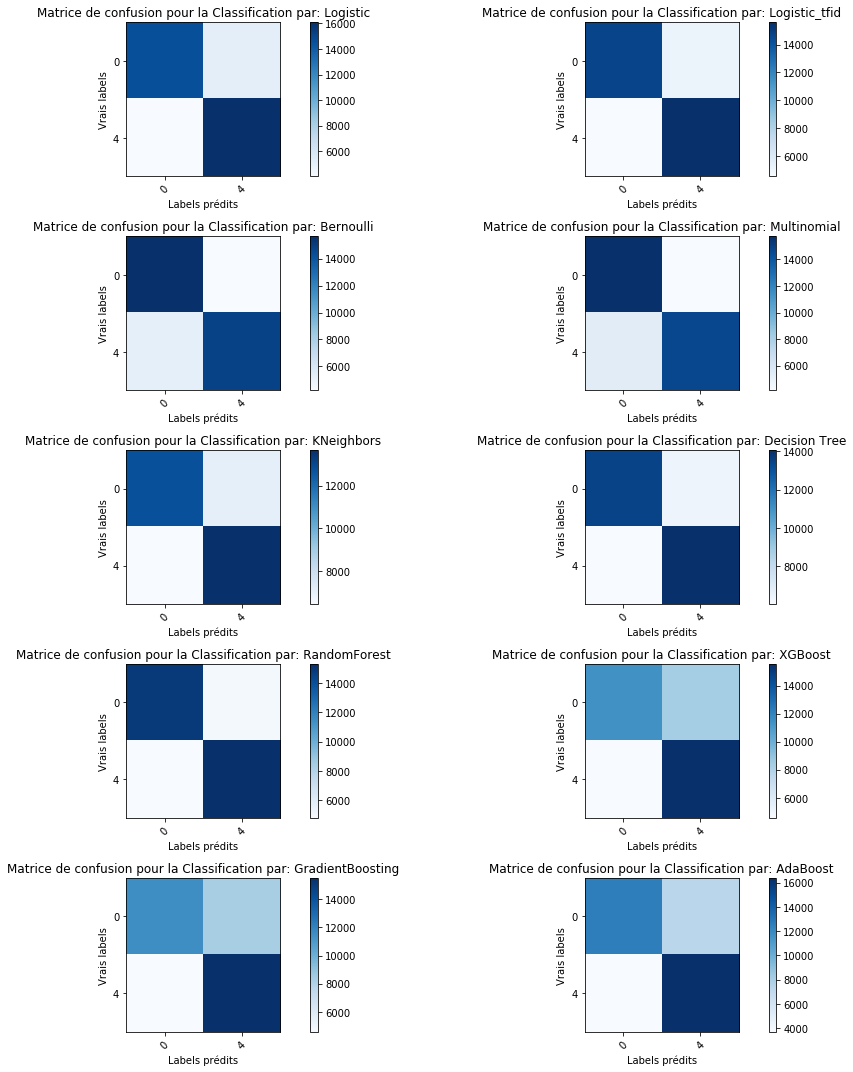

In [94]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(15,15))
i=0
for model, predicted in prediction_C.items():
    i=i+1
    plt.subplot(5,2,i)
    plt.title('Matrice de confusion pour la Classification par: %s'% model)
    cm_model = confusion_matrix(y_test, predicted)
    plot_confusion_matrix(cm_model)

**Commentaire:** _Les matrices de confusion colorées reflètent bien les résulats des différents modèles avec une intensité de couleur plus prononcée sur la diagonale pour les méthodes de régression logistique, arbre de décision et random forest ._

### 2. Courbes de ROC

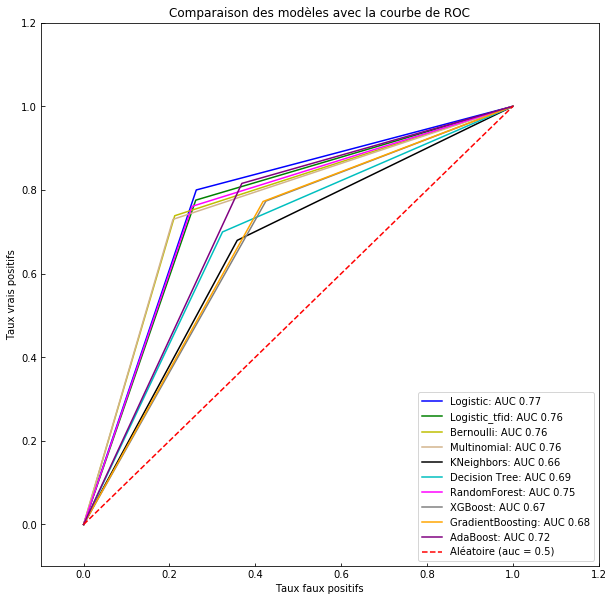

In [95]:
from sklearn.metrics import roc_curve,auc
cmp = 0
colors = ['b', 'g', 'y', 'tan', 'k','c','fuchsia','grey','orange','purple']

plt.figure(figsize=(10,10))
for model, predicted in prediction_C.items():
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, predicted,pos_label=4)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    plt.plot(false_positive_rate, true_positive_rate, colors[cmp], label='%s: AUC %0.2f'% (model,roc_auc))
    cmp += 1
plt.title('Comparaison des modèles avec la courbe de ROC')
plt.plot([0, 1], [0, 1], color='r',linestyle='--',label='Aléatoire (auc = 0.5)')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('Taux vrais positifs')
plt.xlabel('Taux faux positifs')
plt.legend(loc='best')
plt.tick_params(direction='in')
plt.show()

**Commentaire:** _Ce graphique présente toutes les courbes de ROC des différents modèles. Il confirme les résultats antérieurs avec des modèles bien plus performants que d'autres et notamment: la régression logistique, le naif bayésien et le random forest._  

# Résultats
    1. Comparaison des résultats selon les méthodes de traitement de texte
    2. Comparaison des résultats obtenus avec l'état de l'art 

## 1. Comparaison des résultats selon les méthodes de traitement de texte

**Commentaire:** _On peut donc déduire de tous ces résultats que le modèle qui semble être le plus performant est celui de la regression logiqtique avec un score de 79% et une aire sous la courbe (AUC) de 0.79._ 

**Commentaire:** _Nous avons entrepris de rajouter le Pos Tagging afin d'identifier le genre et la nature de chaque mot qui dans plusieurs cas jouent sur la signification du mot et sa connotation. On a remarqué que ce changement tout comme le traitement du texte (stopwords, minuscule, ponctuation, etc.) ont eu peu d'influence sur les résultats des différents modèles._ 

## 2. Comparaison des résultats obtenus avec l'état de l'art 

**Commentaire:** _Si on essaie maintenant de comparer les performances de notre modèle à l'état de l'art, on peut remarquer qu'il se situe dans les standards des résulats publiés.
Par exemple, Agarwal, Apoorv, et al. ont obtenu un score de 75.39%. De même, Kharde, Vishal, and Prof Sonawane ont obtenu des scores variant entre 74 et 76%. Par ailleurs, Go, Alec, Richa Bhayani, and Lei Huang ont obtenu le score le plus performant autour de 80% avec un modèle naif bayésien. On peut également noter l'excellente performance de Bollen, Johan, Huina Mao, and Xiaojun Zeng avec un score avoisinant les 88% grâce à un modèle de réseau de neurones. Néanmoins, on a obtenu des scores supérieurs à certaines publications comme: Pak, Alexander, and Patrick Paroubek (65%) et Sailunaz, Kashfia, and Reda Alhajj (66%)._ 

### Des tweets dont les prévisions sont pas corrects .

In [13]:
df['prediction'] = logreg.predict(vectorizer.transform(X)) 

Les tweets positifs mais ses prévisions sont négatifs.

In [14]:
df_pos_but_pred_neg = df[(df.target == 4) & (df.prediction == 0)]['text'].reset_index(drop = True)

Les tweets négatifs mais ses prévisions sont positifs.

In [15]:
df_neg_but_pred_pos = df[(df.target == 0) & (df.prediction == 4)]['text'].reset_index(drop = True)

Example:

In [16]:
df_pos_but_pred_neg[27]

'Jon could totally say Mannies and Peddies and I would shut my fat face about it.  '

In [17]:
df_neg_but_pred_pos[10]

"@localtweeps Wow, tons of replies from you, may have to unfollow so I can see my friends' tweets, you're scrolling the feed a lot. "